In [452]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
import seaborn as sns

In [390]:
df=pd.read_csv("Apple.csv")

In [391]:
df['Date'] = pd.to_datetime(df['Date'])

In [392]:
df.set_index('Date',inplace=True)

In [393]:
df=df.loc['2012-01-01':]
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.557464,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.624949,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.765109,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.898556,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.878093,394024400
...,...,...,...,...,...,...
2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300
2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000


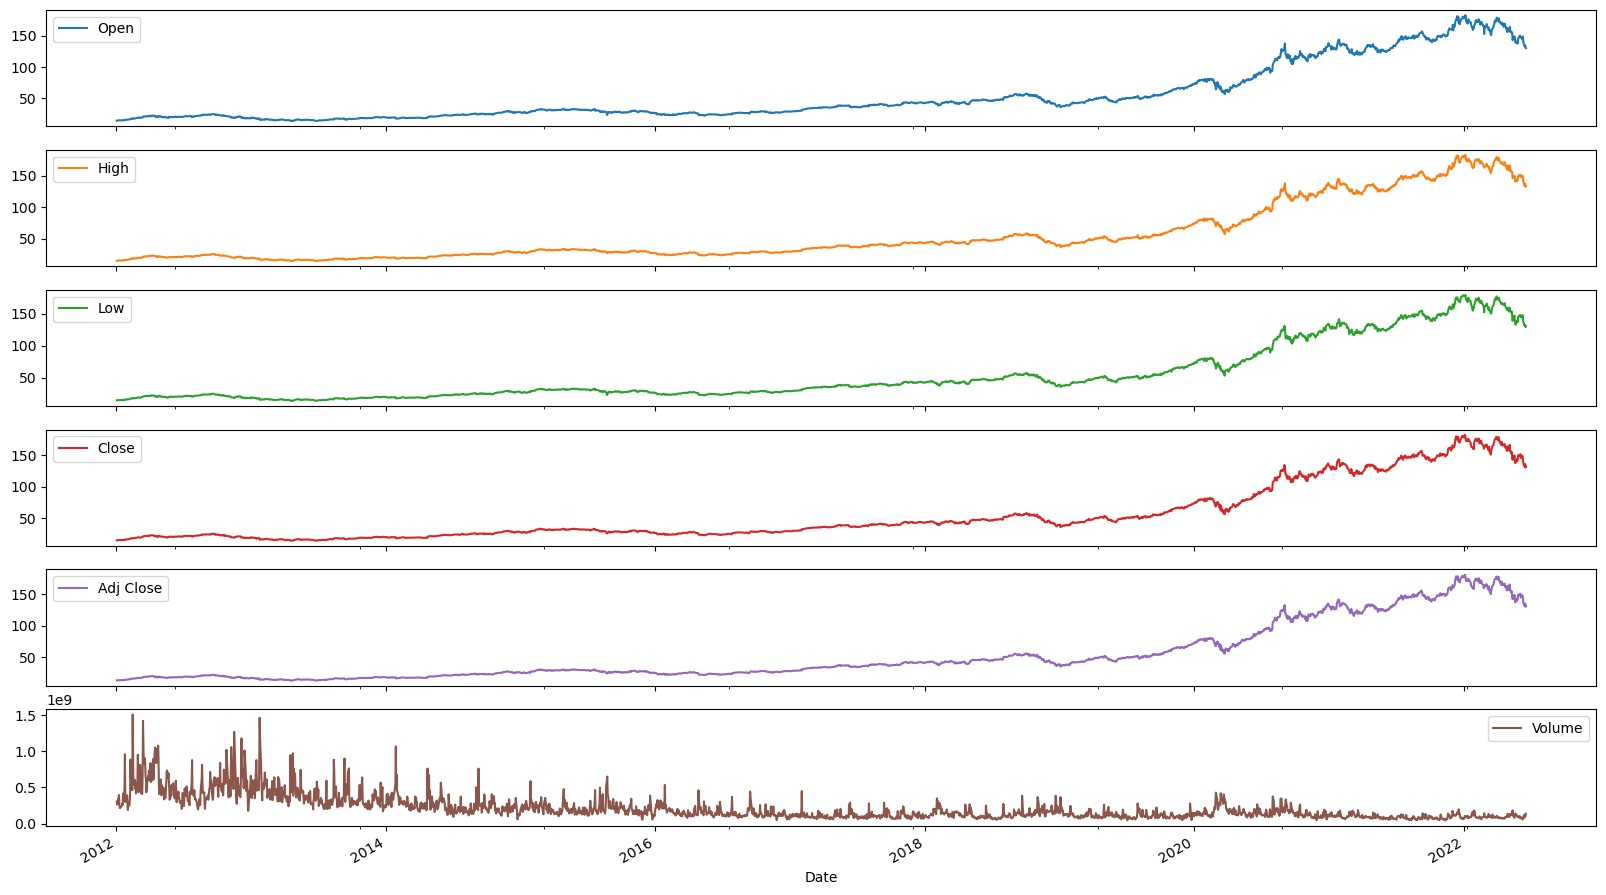

In [394]:
df.plot(subplots=True, figsize=(20, 12))
plt.show()

In [395]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.557464,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.624949,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.765109,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.898556,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.878093,394024400


In [396]:
df.shape

(2633, 6)

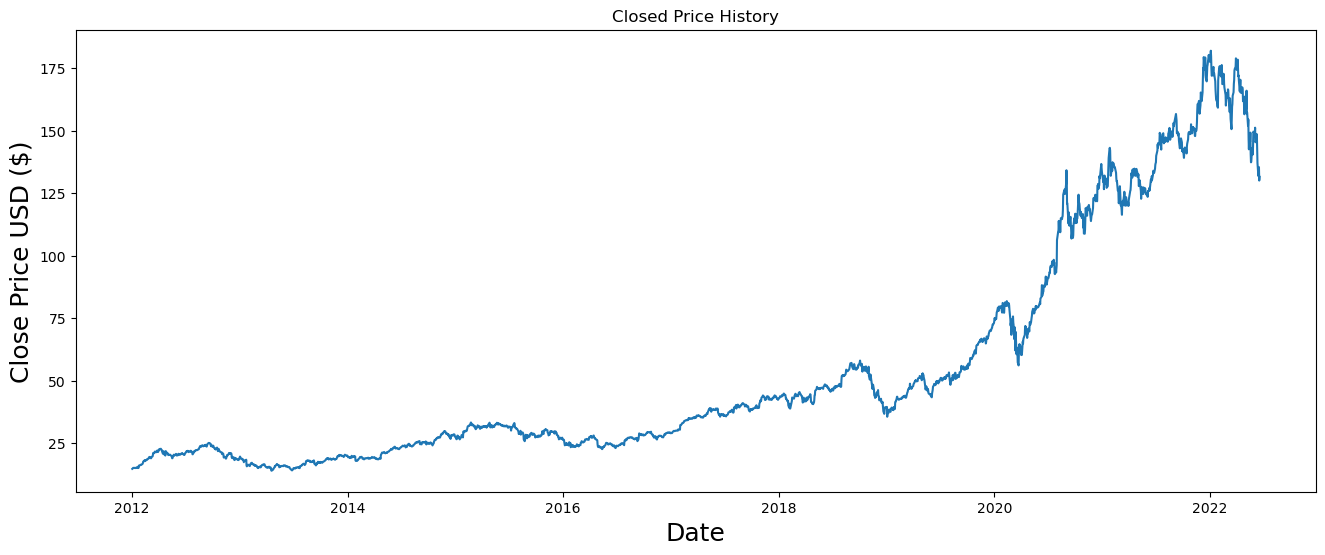

In [397]:
plt.figure(figsize=(16,6))
plt.title('Closed Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

/Users/amitbangar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


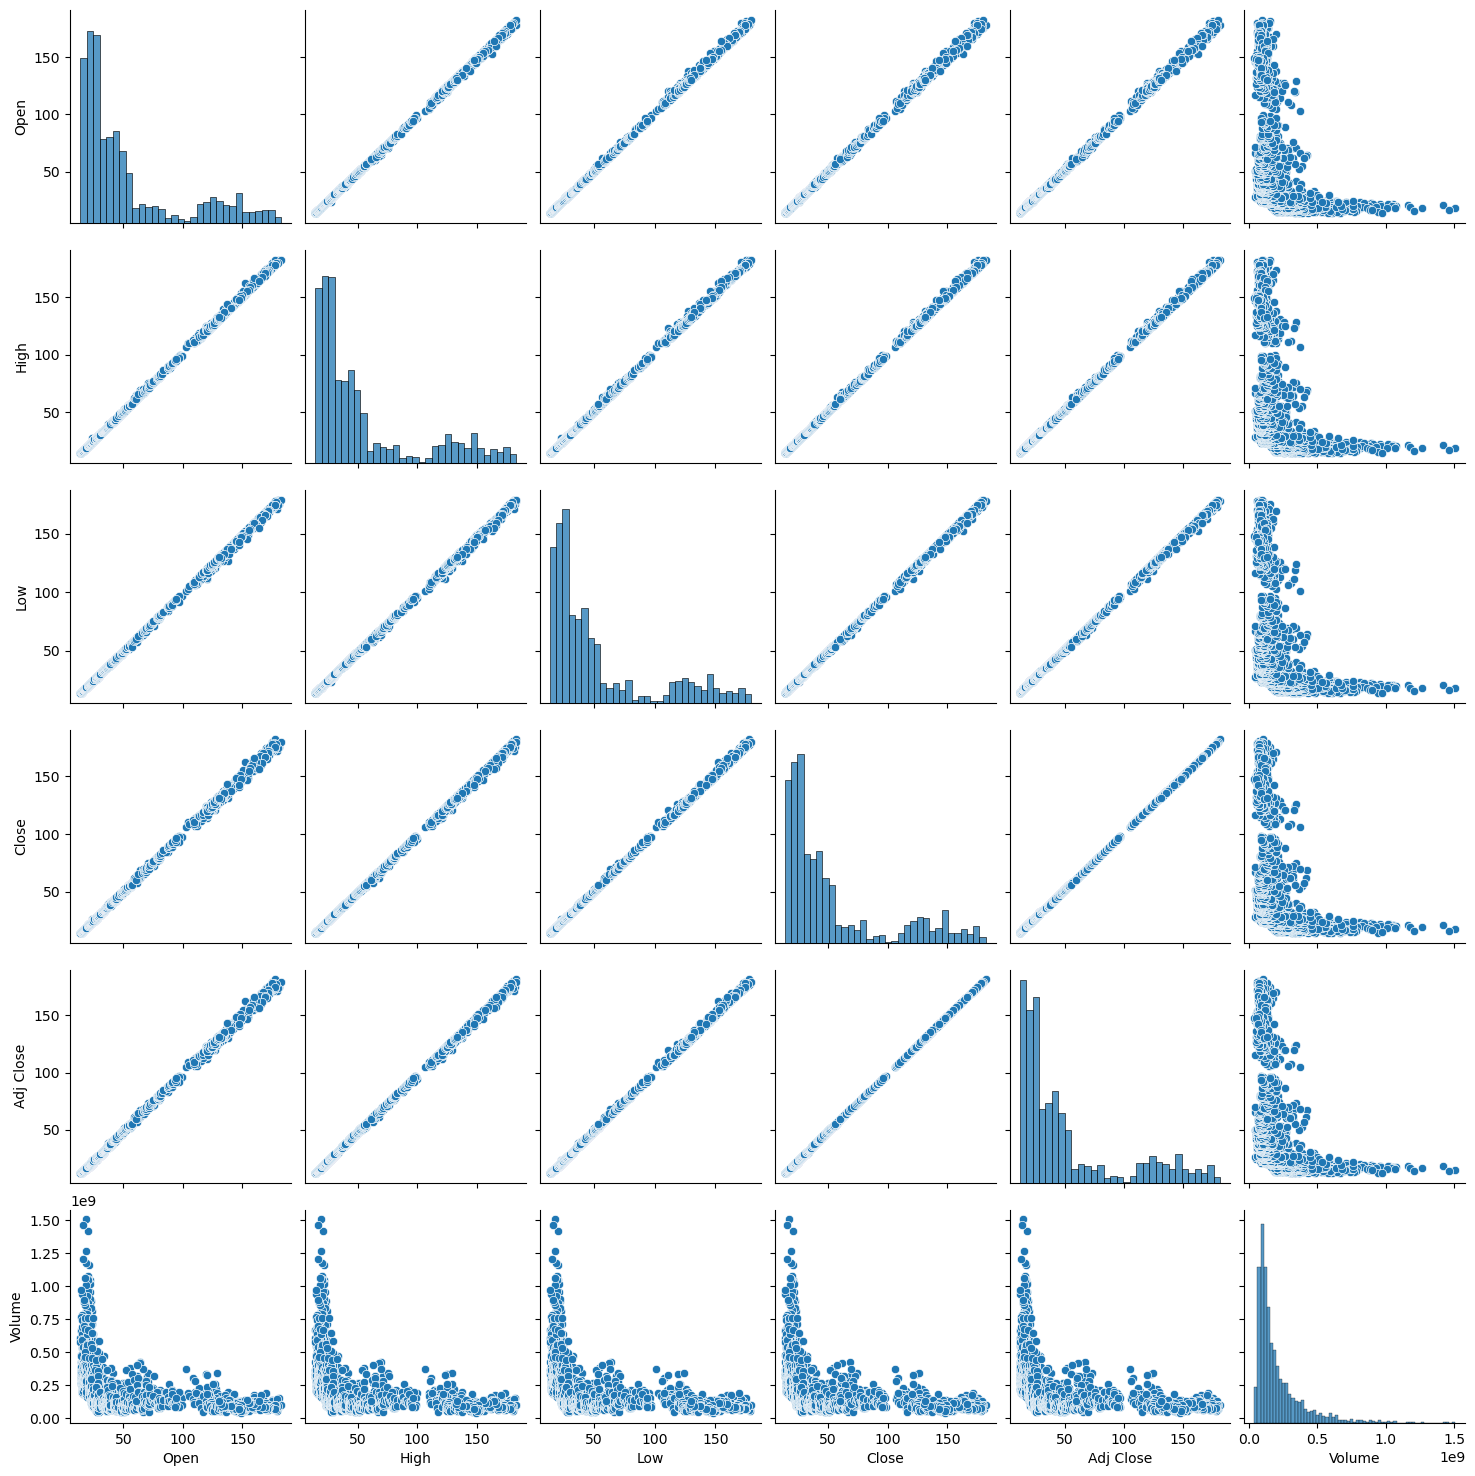

In [398]:
sns.pairplot(df)

In [399]:
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 5), gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title, fontsize=18)
    sns.boxplot(x=col, data=df, width=1, ax=ax[0],boxprops=dict(facecolor='brown'))
    ax[0].set(yticks=[])
    sns.histplot(df[col], kde=True, ax=ax[1],color='#000000')
    plt.xticks(rotation=45)
    ax[1].set_xlabel(col, fontsize=16)
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()[0]
    ax[1].axvline(mean, color='red', linewidth=2.3, label='mean='+ str(np.round(mean, 1)) + symb)
    ax[1].axvline(median, color='green', linewidth=2.3, label='median='+ str(np.round(median, 1)) + symb)
    ax[1].axvline(mode, color='blue', linewidth=2.3, label='mode='+ str(mode) + symb)
    ax[1].legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=10, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

In [475]:
#Create a new dataframe with only the 'Close column
data = df.filter([ 'Close'])
data1=df.filter(['Open'])
data2=df.filter(['Adj Close'])
data3=df.filter(['Low'])
data4=df.filter(['High'])
data5=df.filter(['Volume'])
#Convert the dataframe to a numpy array
dataset = data.values

#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8 )
print(training_data_len)

2107


In [476]:
#Scale the data
scaler = MinMaxScaler (feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00439888],
       [0.00486851],
       [0.00584392],
       ...,
       [0.72284118],
       [0.69088881],
       [0.69981407]])

In [477]:
#Create the training data set For close
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)): 
    x_train.append (train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00439888, 0.00486851, 0.00584392, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655794, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149657, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527334,
       0.0227679 , 0.02373267, 0.02371355, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873718, 0.03078787, 0.03228178,
       0.03271316, 0.03286405, 0.03030974, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144717, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825799])]
[0.04660893556292853]

[array([0.00439888, 0.00486851, 0.00584392, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655794, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [478]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [479]:
x_train.dtype

dtype('float64')

In [480]:
x_train.shape[0]

2047

In [481]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [482]:
x_train.shape

(2047, 60, 1)

In [483]:
#Building the LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
          

/Users/amitbangar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [484]:
#compilint the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [569]:
#training the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

2047/2047 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 1.3442e-04


In [570]:
#create the testing dataset
#create a new array containing scaled values from 2047 to 2633
test_data=scaled_data[training_data_len-60:,:]
#creating the test data set x_test,y_test
x_test=[]
y_test=scaled_data[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [571]:
#converting the data to a numpy array
x_test=np.array(x_test)

In [572]:
#reshaping the nparray to 3d
x_test.shape

(526, 60)

In [573]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [574]:
x_test.shape

(526, 60, 1)

In [575]:
#Model to predict the values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [576]:
#getting the root mean square error(RMSE)
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

132.3045483317145

In [567]:
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 131.07305959258477


/var/folders/b2/73_xn1nn4rnffx8w30nx81pm0000gn/T/ipykernel_2074/1838914878.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


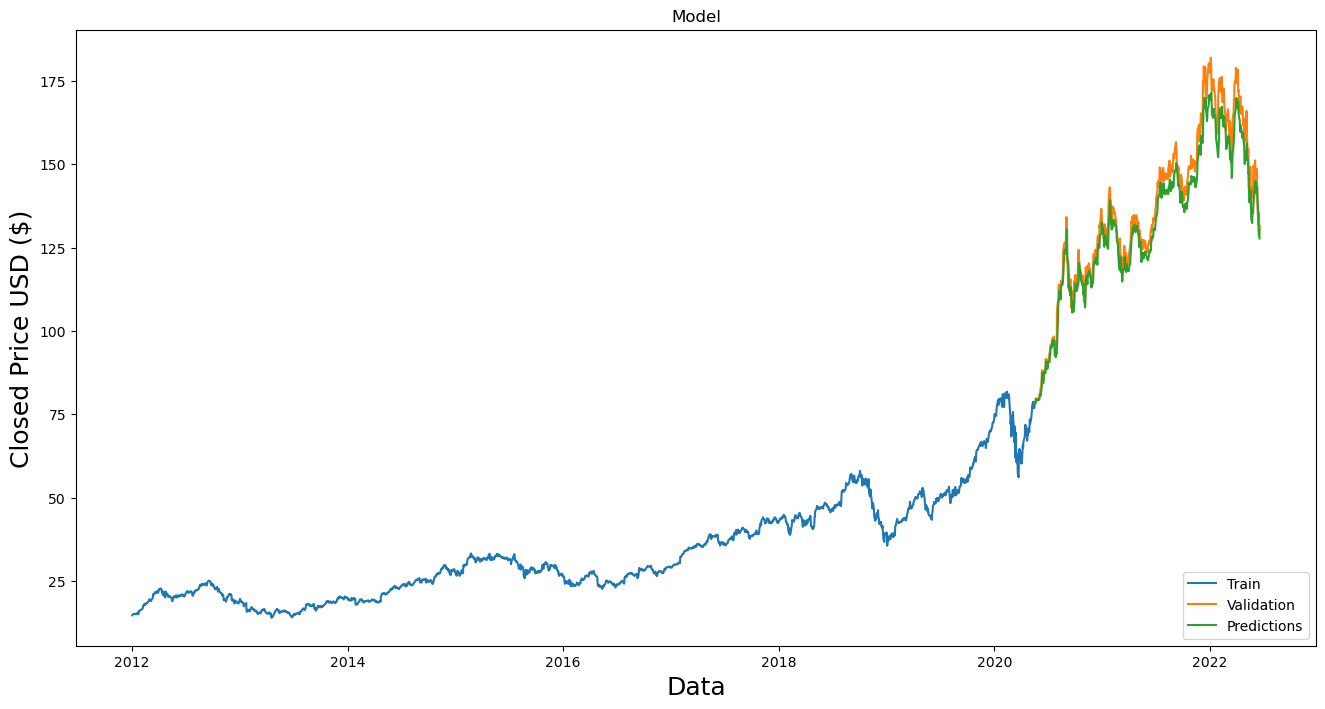

In [568]:
#plot the data
train=data[0:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
#Visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data',fontsize=18)
plt.ylabel('Closed Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Validation','Predictions'], loc='lower right')
plt.show()

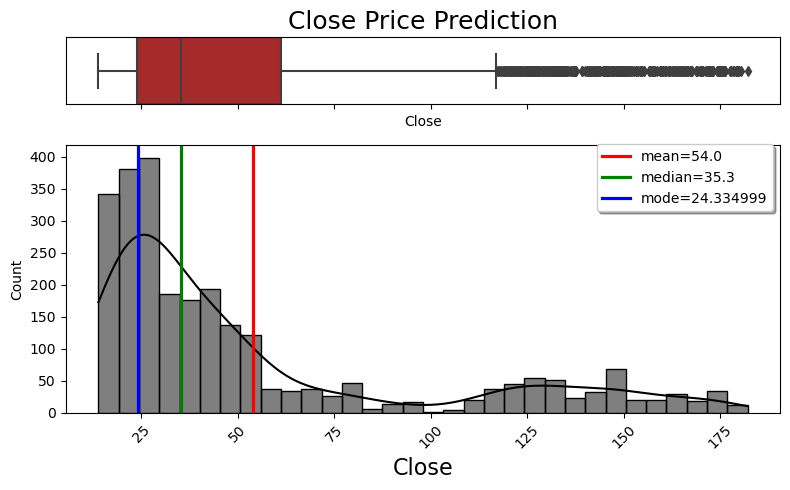

In [419]:
num_plot(data,"Close", "Close Price Prediction","")

In [420]:
scaled_data1 = scaler.fit_transform(dataset1)
#Create the training data set For open
#Create the scaled training data set
train_data1 = scaled_data1[0:training1_data_len , :]
#Split the data into x_train and y_train data sets
x_train1 = []
y_train1 = []
for i in range(60, len(train_data1)): 
    x_train1.append (train_data1[i-60:i, 0])
    y_train1.append(train_data1[i, 0])
    if i<= 61:
        print(x_train1)
        print(y_train1)
        print()

[array([0.00453481, 0.00466177, 0.00570925, 0.00672921, 0.00794174,
       0.00802849, 0.00734499, 0.00726035, 0.0067144 , 0.00766664,
       0.00825068, 0.00892572, 0.00836284, 0.00734288, 0.00785709,
       0.01406573, 0.01277914, 0.01192847, 0.01221837, 0.01430908,
       0.01490583, 0.01437468, 0.01467094, 0.01489947, 0.01635324,
       0.0174642 , 0.01963531, 0.02179374, 0.02360724, 0.02469279,
       0.02672425, 0.02190801, 0.0243648 , 0.02516258, 0.02647456,
       0.02689777, 0.02786907, 0.0282161 , 0.02962332, 0.03250122,
       0.03389995, 0.03306833, 0.03331803, 0.02871339, 0.03149395,
       0.03104745, 0.03306198, 0.03407136, 0.03588275, 0.04022288,
       0.04478518, 0.0416343 , 0.04452279, 0.04476403, 0.04544752,
       0.04439793, 0.04497141, 0.04482327, 0.04617547, 0.0487571 ])]
[0.047572091315949305]

[array([0.00453481, 0.00466177, 0.00570925, 0.00672921, 0.00794174,
       0.00802849, 0.00734499, 0.00726035, 0.0067144 , 0.00766664,
       0.00825068, 0.00892572, 0.0

In [421]:
x_train1, y_train1 = np.array(x_train1), np.array(y_train1)
x_train1=np.reshape(x_train1,(x_train1.shape[0],x_train1.shape[1],1))
#Building the LSTM Model 1
model1=Sequential()
model1.add(LSTM(50,return_sequences=True,input_shape=(x_train1.shape[1],1)))
model1.add(LSTM(50,return_sequences=False))
model1.add(Dense(25))
model1.add(Dense(1))
#compilint the model
model1.compile(optimizer='adam',loss='mean_squared_error')
#training the model
model1.fit(x_train1,y_train1,batch_size=1,epochs=1)          

/Users/amitbangar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2047/2047 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 5.2845e-04


In [422]:
#create the testing dataset
#create a new array containing scaled values from 2047 to 2633
test_data1=scaled_data1[training1_data_len-60:,:]
#creating the test data set x_test,y_test
x_test1=[]
y_test1=scaled_data1[training1_data_len:,:]
for i in range(60,len(test_data1)):
    x_test1.append(test_data1[i-60:i,0])
#converting the data to a numpy array
x_test1=np.array(x_test1)
x_test1=np.reshape(x_test1,(x_test1.shape[0],x_test1.shape[1],1))
#Model to predict the values
predictions1=model1.predict(x_test1)
predictions1=scaler.inverse_transform(predictions1)

#getting the root mean square error(RMSE)
rmse1=np.sqrt(np.mean(predictions1-y_test1)**2)
rmse1

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


134.86134992571328

/var/folders/b2/73_xn1nn4rnffx8w30nx81pm0000gn/T/ipykernel_2074/4108747372.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid1['Predictions']=predictions1


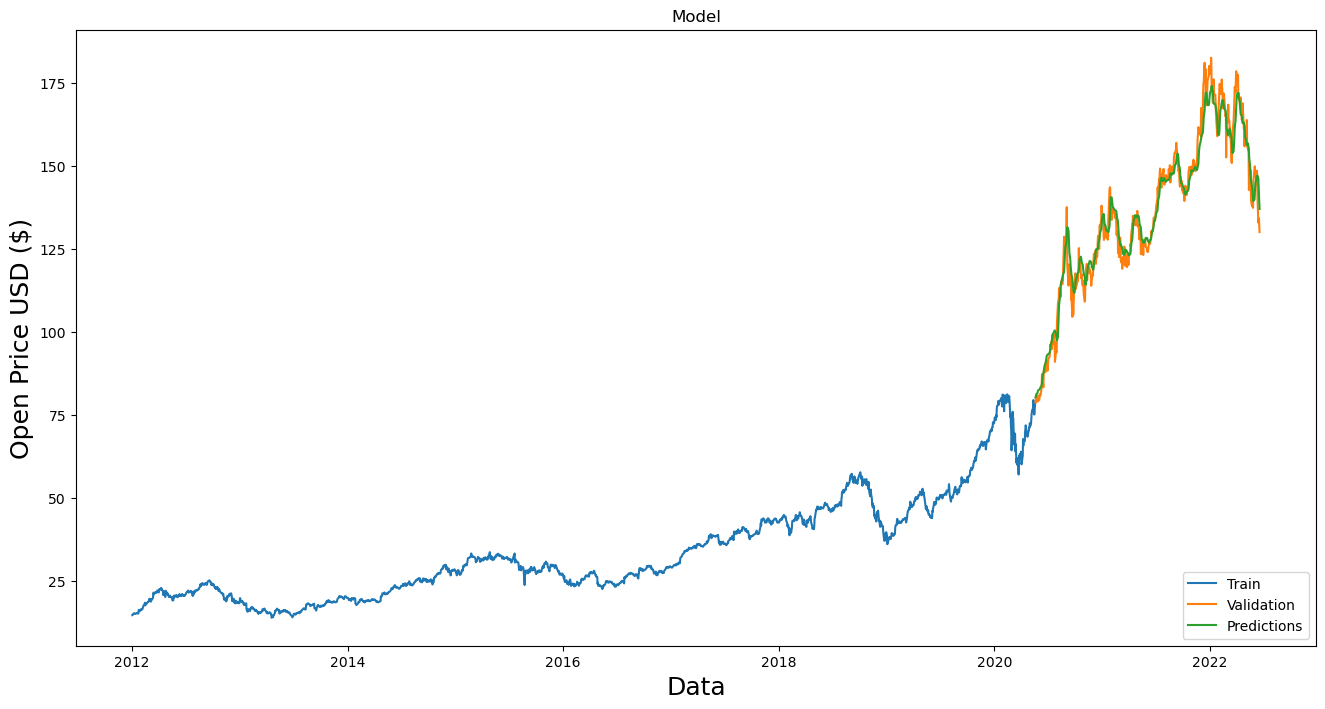

In [423]:
#plot the data
train1=data1[0:training1_data_len]
valid1=data1[training1_data_len:]
valid1['Predictions']=predictions1
#Visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data',fontsize=18)
plt.ylabel('Open Price USD ($)', fontsize=18)
plt.plot(train1['Open'])
plt.plot(valid1[['Open','Predictions']])
plt.legend(['Train','Validation','Predictions'], loc='lower right')
plt.show()

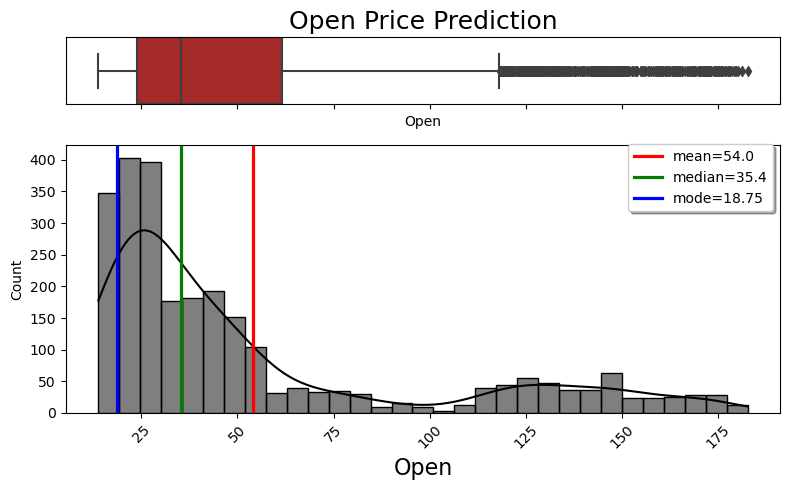

In [424]:
num_plot(data1,"Open", "Open Price Prediction","")

In [425]:
scaled_data2 = scaler.fit_transform(dataset2)
#Create the training data set For open
#Create the scaled training data set
train_data2 = scaled_data2[0:training2_data_len , :]
#Split the data into x_train and y_train data sets
x_train2 = []
y_train2 = []
for i in range(60, len(train_data2)): 
    x_train2.append (train_data2[i-60:i, 0])
    y_train2.append(train_data2[i, 0])
    if i<= 61:
        print(x_train2)
        print(y_train2)
        print()

[array([0.00269215, 0.0030905 , 0.00391784, 0.00470556, 0.00458477,
       0.00485697, 0.00473259, 0.0045235 , 0.00423872, 0.00512013,
       0.00591505, 0.0056699 , 0.00432703, 0.00560863, 0.00434687,
       0.00907844, 0.00871255, 0.0091902 , 0.01022305, 0.01084853,
       0.01079623, 0.01060337, 0.01142531, 0.01219857, 0.01307461,
       0.01448958, 0.01746192, 0.01750697, 0.01916168, 0.0203982 ,
       0.01827303, 0.01909137, 0.01907514, 0.02136975, 0.02104348,
       0.02164735, 0.02273245, 0.0233363 , 0.02507569, 0.02634289,
       0.02670878, 0.02683672, 0.02467014, 0.0241474 , 0.02422493,
       0.02626175, 0.02683496, 0.02806611, 0.03096808, 0.03483991,
       0.03411531, 0.03411706, 0.03691637, 0.0377924 , 0.03716872,
       0.03659916, 0.03600612, 0.03797626, 0.03932813, 0.03989413])]
[0.038495376878375134]

[array([0.00269215, 0.0030905 , 0.00391784, 0.00470556, 0.00458477,
       0.00485697, 0.00473259, 0.0045235 , 0.00423872, 0.00512013,
       0.00591505, 0.0056699 , 0.0

In [426]:
x_train2, y_train2 = np.array(x_train2), np.array(y_train2)
x_train2=np.reshape(x_train2,(x_train2.shape[0],x_train2.shape[1],1))
#Building the LSTM Model 1
model2=Sequential()
model2.add(LSTM(50,return_sequences=True,input_shape=(x_train2.shape[1],1)))
model2.add(LSTM(50,return_sequences=False))
model2.add(Dense(25))
model2.add(Dense(1))
#compilint the model
model2.compile(optimizer='adam',loss='mean_squared_error')
#training the model
model2.fit(x_train2,y_train2,batch_size=1,epochs=1)          

/Users/amitbangar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2047/2047 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 5.5457e-04


In [427]:
#create the testing dataset
#create a new array containing scaled values from 2047 to 2633
test_data2=scaled_data2[training2_data_len-60:,:]
#creating the test data set x_test,y_test
x_test2=[]
y_test2=scaled_data2[training2_data_len:,:]
for i in range(60,len(test_data2)):
    x_test2.append(test_data2[i-60:i,0])
#converting the data to a numpy array
x_test2=np.array(x_test2)
x_test2=np.reshape(x_test2,(x_test2.shape[0],x_test2.shape[1],1))
#Model to predict the values
predictions2=model2.predict(x_test2)
predictions2=scaler.inverse_transform(predictions2)

#getting the root mean square error(RMSE)
rmse2=np.sqrt(np.mean(predictions2-y_test2)**2)
rmse2

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


134.90415052189024

/var/folders/b2/73_xn1nn4rnffx8w30nx81pm0000gn/T/ipykernel_2074/3391108462.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid2['Predictions']=predictions2


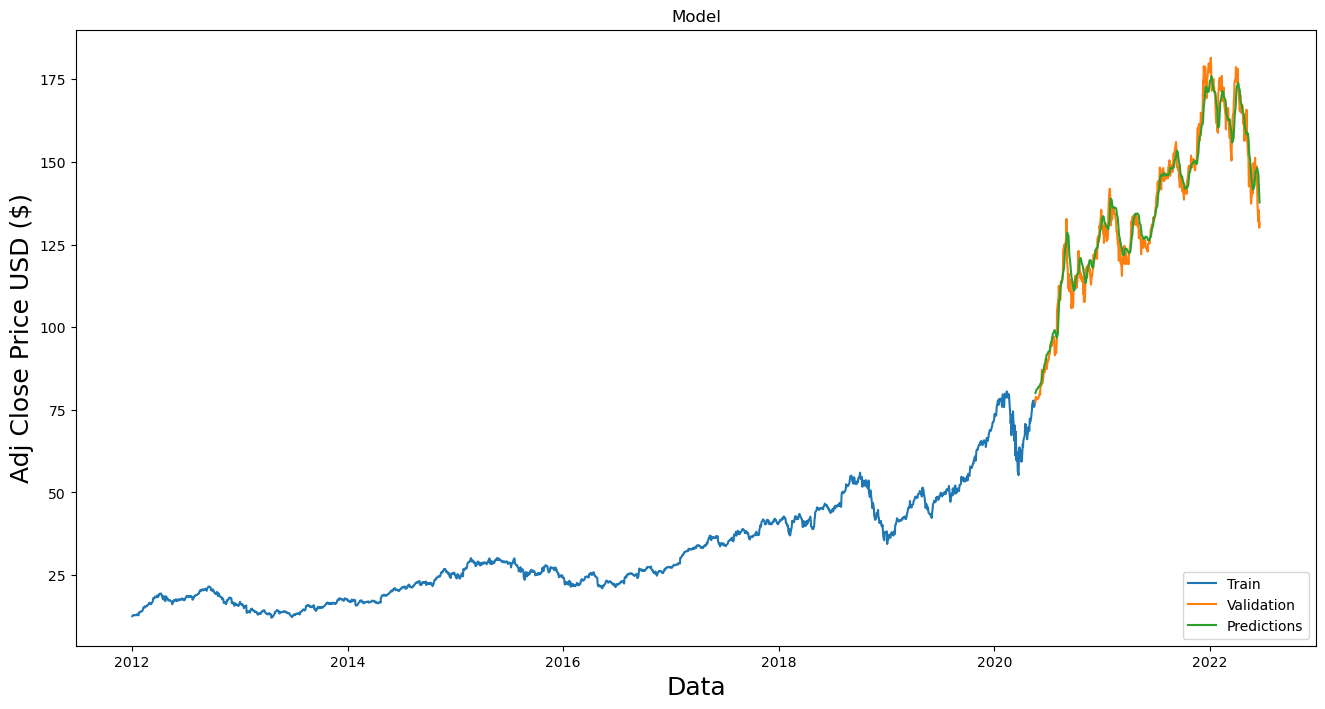

In [428]:
#plot the data
train2=data2[0:training2_data_len]
valid2=data2[training2_data_len:]
valid2['Predictions']=predictions2
#Visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data',fontsize=18)
plt.ylabel('Adj Close Price USD ($)', fontsize=18)
plt.plot(train2['Adj Close'])
plt.plot(valid2[['Adj Close','Predictions']])
plt.legend(['Train','Validation','Predictions'], loc='lower right')
plt.show()

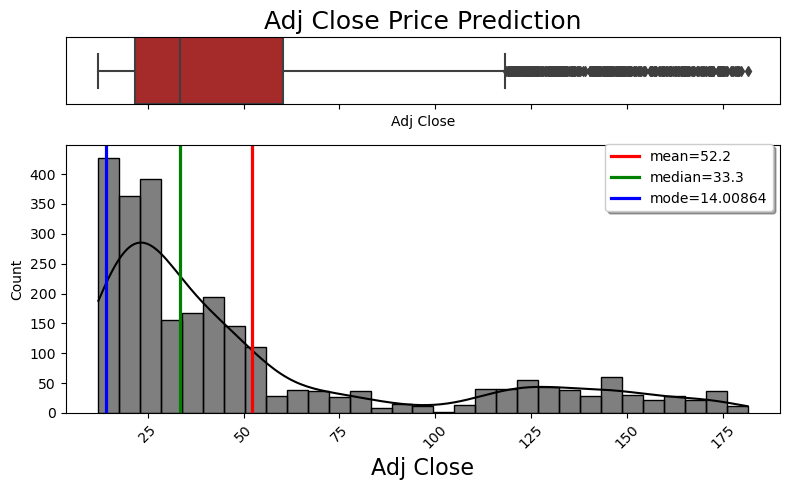

In [429]:
num_plot(data2,"Adj Close", "Adj Close Price Prediction","")

In [430]:
scaled_data3 = scaler.fit_transform(dataset3)
#Create the training data set For open
#Create the scaled training data set
train_data3 = scaled_data3[0:training3_data_len , :]
#Split the data into x_train and y_train data sets
x_train3 = []
y_train3 = []
for i in range(60, len(train_data3)): 
    x_train3.append (train_data3[i-60:i, 0])
    y_train3.append(train_data3[i, 0])
    if i<= 61:
        print(x_train3)
        print(y_train3)
        print()

[array([0.0051617 , 0.00522217, 0.00595431, 0.00736892, 0.00782894,
       0.00786133, 0.00738836, 0.00726741, 0.00724798, 0.00817665,
       0.00889799, 0.00894335, 0.00748338, 0.00803411, 0.00744019,
       0.01266236, 0.01253494, 0.012671  , 0.01302087, 0.01467952,
       0.01521514, 0.01487606, 0.01521729, 0.01578746, 0.01716534,
       0.01827112, 0.02061656, 0.02234216, 0.02418655, 0.02524697,
       0.02414335, 0.02192749, 0.02487981, 0.02570483, 0.02677387,
       0.02686674, 0.02884072, 0.02833103, 0.03039786, 0.03252518,
       0.0331882 , 0.03399809, 0.03043025, 0.02831806, 0.02984714,
       0.031752  , 0.03412552, 0.03496563, 0.03685538, 0.0410992 ,
       0.04177952, 0.04166073, 0.04404721, 0.04457202, 0.04671661,
       0.0454467 , 0.04520265, 0.04538839, 0.04772087, 0.04863874])]
[0.047973559614495856]

[array([0.0051617 , 0.00522217, 0.00595431, 0.00736892, 0.00782894,
       0.00786133, 0.00738836, 0.00726741, 0.00724798, 0.00817665,
       0.00889799, 0.00894335, 0.0

In [431]:
x_train3, y_train3 = np.array(x_train3), np.array(y_train3)
x_train3=np.reshape(x_train3,(x_train3.shape[0],x_train3.shape[1],1))
#Building the LSTM Model 1
model3=Sequential()
model3.add(LSTM(50,return_sequences=True,input_shape=(x_train3.shape[1],1)))
model3.add(LSTM(50,return_sequences=False))
model3.add(Dense(25))
model3.add(Dense(1))
#compilint the model
model3.compile(optimizer='adam',loss='mean_squared_error')
#training the model
model3.fit(x_train3,y_train3,batch_size=1,epochs=1)          

/Users/amitbangar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2047/2047 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - loss: 5.1355e-04


In [432]:
#create the testing dataset
#create a new array containing scaled values from 2047 to 2633
test_data3=scaled_data3[training3_data_len-60:,:]
#creating the test data set x_test,y_test
x_test3=[]
y_test3=scaled_data3[training3_data_len:,:]
for i in range(60,len(test_data3)):
    x_test3.append(test_data3[i-60:i,0])
#converting the data to a numpy array
x_test3=np.array(x_test3)
x_test3=np.reshape(x_test3,(x_test3.shape[0],x_test3.shape[1],1))
#Model to predict the values
predictions3=model3.predict(x_test3)
predictions3=scaler.inverse_transform(predictions3)

#getting the root mean square error(RMSE)
rmse3=np.sqrt(np.mean(predictions3-y_test3)**2)
rmse3

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


126.61821536098991

/var/folders/b2/73_xn1nn4rnffx8w30nx81pm0000gn/T/ipykernel_2074/4054570575.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid3['Predictions']=predictions3


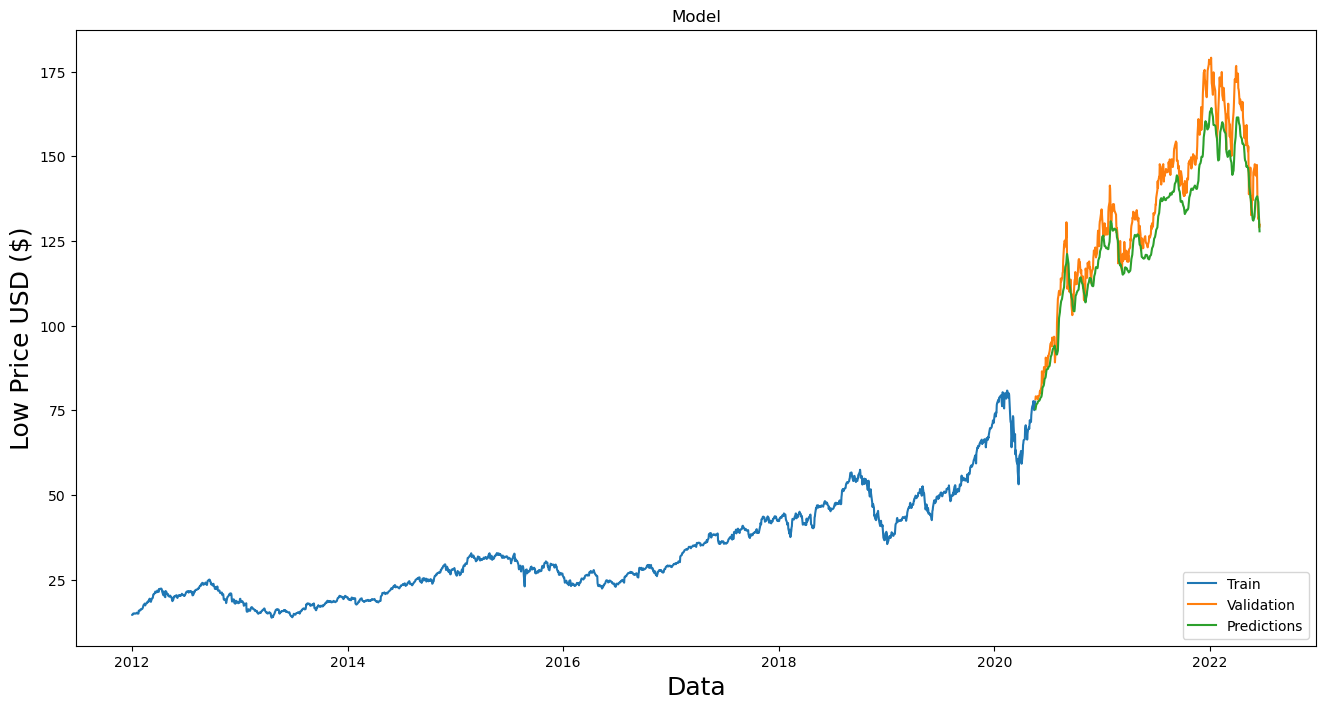

In [433]:
#plot the data
train3=data3[0:training3_data_len]
valid3=data3[training3_data_len:]
valid3['Predictions']=predictions3
#Visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data',fontsize=18)
plt.ylabel('Low Price USD ($)', fontsize=18)
plt.plot(train3['Low'])
plt.plot(valid3[['Low','Predictions']])
plt.legend(['Train','Validation','Predictions'], loc='lower right')
plt.show()

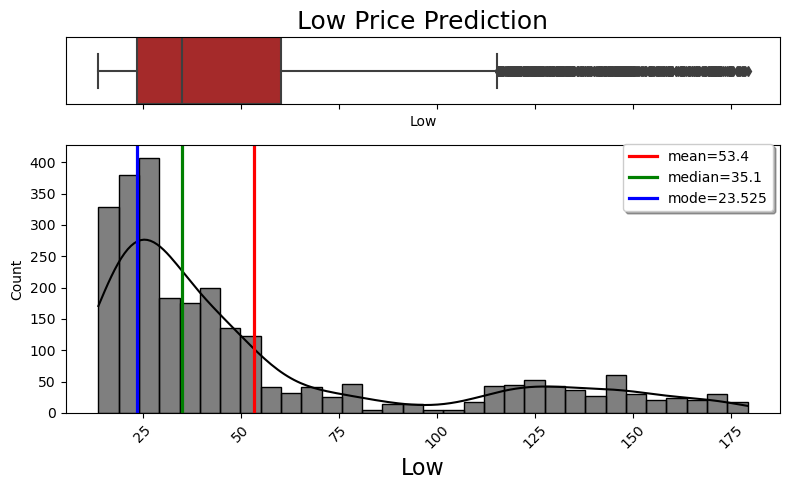

In [434]:
num_plot(data3,"Low", "Low Price Prediction","")

In [435]:
scaled_data4 = scaler.fit_transform(dataset4)
#Create the training data set For open
#Create the scaled training data set
train_data4 = scaled_data4[0:training4_data_len , :]
#Split the data into x_train and y_train data sets
x_train4 = []
y_train4 = []
for i in range(60, len(train_data4)): 
    x_train4.append (train_data4[i-60:i, 0])
    y_train4.append(train_data4[i, 0])
    if i<= 61:
        print(x_train4)
        print(y_train4)
        print()

[array([0.00273148, 0.00319307, 0.00401251, 0.00490183, 0.00596055,
       0.00559   , 0.00492301, 0.00493359, 0.00441482, 0.00558788,
       0.00632474, 0.00672705, 0.00590761, 0.00610877, 0.00539943,
       0.01161406, 0.0104156 , 0.01034997, 0.01149761, 0.01241656,
       0.01257538, 0.01219   , 0.01278924, 0.01384371, 0.01485373,
       0.01634439, 0.02057077, 0.02075498, 0.02206991, 0.02328318,
       0.02682563, 0.02229435, 0.02290418, 0.02440331, 0.02453882,
       0.0250343 , 0.02610783, 0.02729359, 0.02875673, 0.03133999,
       0.03146704, 0.03116847, 0.03131245, 0.02839253, 0.02925856,
       0.03036174, 0.03136752, 0.03226954, 0.03569553, 0.04131517,
       0.04243529, 0.04014635, 0.04280795, 0.04389419, 0.04447648,
       0.04338602, 0.04281431, 0.04394713, 0.04588034, 0.04697505])]
[0.04593962504206402]

[array([0.00273148, 0.00319307, 0.00401251, 0.00490183, 0.00596055,
       0.00559   , 0.00492301, 0.00493359, 0.00441482, 0.00558788,
       0.00632474, 0.00672705, 0.00

In [436]:
x_train4, y_train4 = np.array(x_train4), np.array(y_train4)
x_train4=np.reshape(x_train4,(x_train4.shape[0],x_train4.shape[1],1))
#Building the LSTM Model 1
model4=Sequential()
model4.add(LSTM(50,return_sequences=True,input_shape=(x_train4.shape[1],1)))
model4.add(LSTM(50,return_sequences=False))
model4.add(Dense(25))
model4.add(Dense(1))
#compilint the model
model4.compile(optimizer='adam',loss='mean_squared_error')
#training the model
model4.fit(x_train4,y_train4,batch_size=1,epochs=1)          

/Users/amitbangar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2047/2047 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - loss: 4.4227e-04


In [437]:
#create the testing dataset
#create a new array containing scaled values from 2047 to 2633
test_data4=scaled_data4[training4_data_len-60:,:]
#creating the test data set x_test,y_test
x_test4=[]
y_test4=scaled_data4[training4_data_len:,:]
for i in range(60,len(test_data4)):
    x_test4.append(test_data4[i-60:i,0])
#converting the data to a numpy array
x_test4=np.array(x_test4)
x_test4=np.reshape(x_test4,(x_test4.shape[0],x_test4.shape[1],1))
#Model to predict the values
predictions4=model4.predict(x_test4)
predictions4=scaler.inverse_transform(predictions4)

#getting the root mean square error(RMSE)
rmse4=np.sqrt(np.mean(predictions4-y_test4)**2)
rmse4

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


137.2191551431143

/var/folders/b2/73_xn1nn4rnffx8w30nx81pm0000gn/T/ipykernel_2074/2298922445.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid4['Predictions']=predictions4


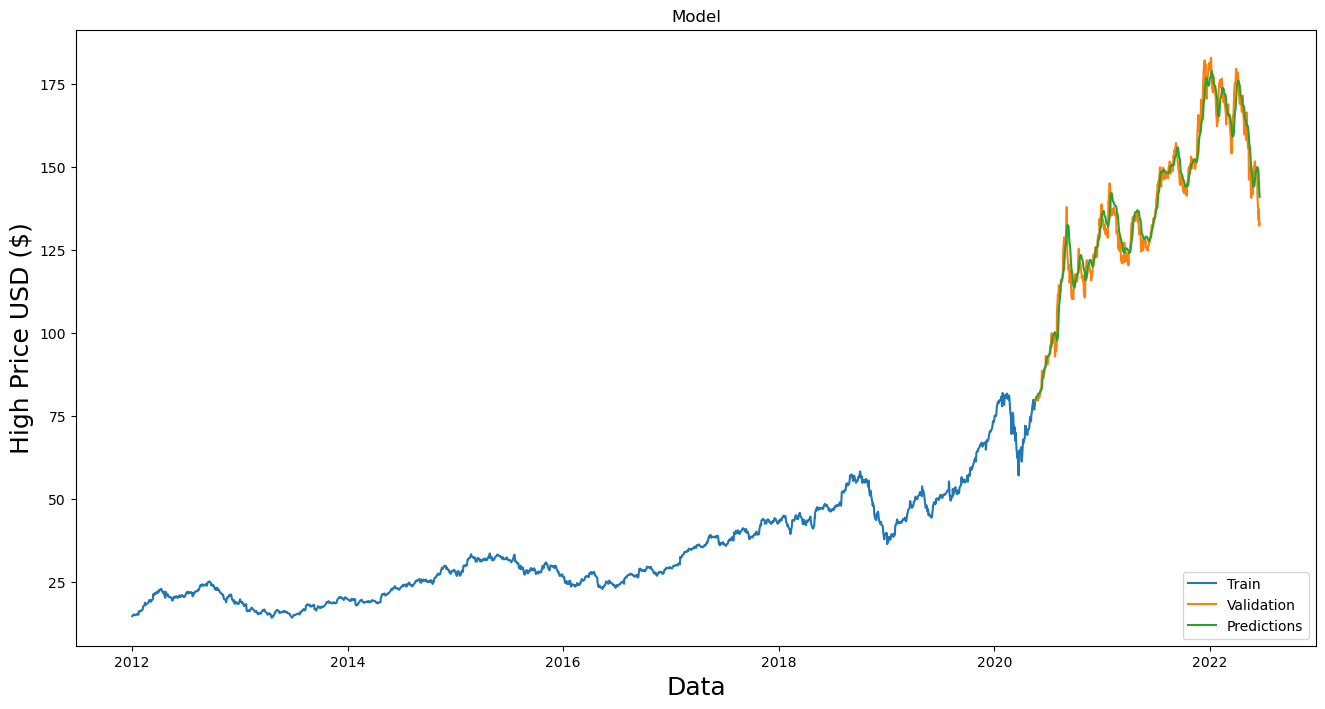

In [438]:
#plot the data
train4=data4[0:training4_data_len]
valid4=data4[training4_data_len:]
valid4['Predictions']=predictions4
#Visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data',fontsize=18)
plt.ylabel('High Price USD ($)', fontsize=18)
plt.plot(train4['High'])
plt.plot(valid4[['High','Predictions']])
plt.legend(['Train','Validation','Predictions'], loc='lower right')
plt.show()

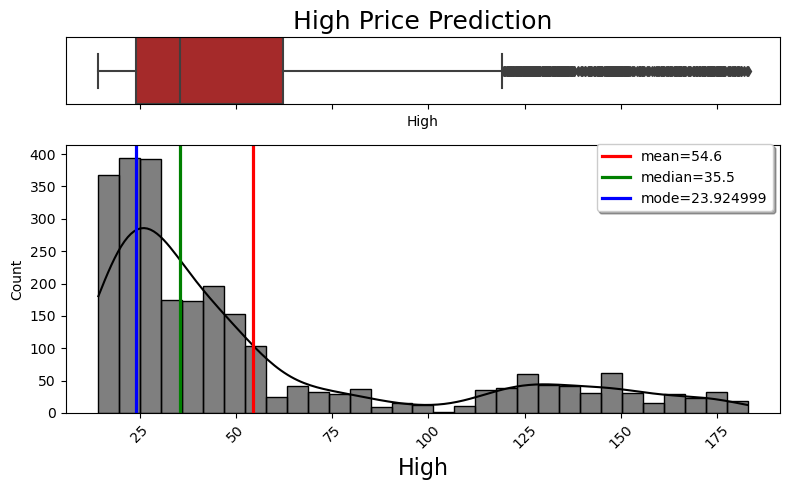

In [439]:
num_plot(data4,"High", "High Price Prediction","")

In [440]:
scaled_data5 = scaler.fit_transform(dataset5)
#Create the training data set For open
#Create the scaled training data set
train_data5 = scaled_data5[0:training5_data_len , :]
#Split the data into x_train and y_train data sets
x_train5 = []
y_train5 = []
for i in range(60, len(train_data5)): 
    x_train5.append (train_data5[i-60:i, 0])
    y_train5.append(train_data5[i, 0])
    if i<= 61:
        print(x_train5)
        print(y_train5)
        print()

[array([0.17829311, 0.14949083, 0.15716774, 0.18926286, 0.24095255,
       0.14824479, 0.11881948, 0.11711478, 0.12628426, 0.1378025 ,
       0.16093644, 0.15066233, 0.25456918, 0.18091515, 0.34579966,
       0.62610162, 0.19314814, 0.17657885, 0.23093071, 0.23935487,
       0.15633259, 0.09951158, 0.16763105, 0.14224965, 0.18785055,
       0.25041635, 0.5755261 , 0.40290352, 0.32503549, 0.28625532,
       1.        , 0.61670853, 0.33772333, 0.38535765, 0.30188817,
       0.35971634, 0.25531834, 0.34576144, 0.38180299, 0.62179972,
       0.43837365, 0.26667604, 0.52427405, 0.52503467, 0.51703669,
       0.32451758, 0.2579442 , 0.25000164, 0.44355084, 0.94043082,
       0.76356749, 0.53544256, 0.58714372, 0.52941875, 0.41159905,
       0.39783144, 0.26584089, 0.37863247, 0.38640494, 0.41939254])]
[0.3871617341924211]

[array([0.17829311, 0.14949083, 0.15716774, 0.18926286, 0.24095255,
       0.14824479, 0.11881948, 0.11711478, 0.12628426, 0.1378025 ,
       0.16093644, 0.15066233, 0.254

In [441]:
x_train5, y_train5 = np.array(x_train5), np.array(y_train5)
x_train5=np.reshape(x_train5,(x_train5.shape[0],x_train5.shape[1],1))
#Building the LSTM Model 1
model5=Sequential()
model5.add(LSTM(50,return_sequences=True,input_shape=(x_train5.shape[1],1)))
model5.add(LSTM(50,return_sequences=False))
model5.add(Dense(25))
model5.add(Dense(1))
#compilint the model
model5.compile(optimizer='adam',loss='mean_squared_error')
#training the model
model5.fit(x_train5,y_train5,batch_size=1,epochs=1)          

/Users/amitbangar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2047/2047 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - loss: 0.0062


In [442]:
#create the testing dataset
#create a new array containing scaled values from 2047 to 2633
test_data5=scaled_data5[training5_data_len-60:,:]
#creating the test data set x_test,y_test
x_test5=[]
y_test5=scaled_data5[training5_data_len:,:]
for i in range(60,len(test_data5)):
    x_test5.append(test_data5[i-60:i,0])
#converting the data to a numpy array
x_test5=np.array(x_test5)
x_test5=np.reshape(x_test5,(x_test5.shape[0],x_test5.shape[1],1))
#Model to predict the values
predictions5=model5.predict(x_test5)
predictions5=scaler.inverse_transform(predictions5)

#getting the root mean square error(RMSE)
rmse5=np.sqrt(np.mean(predictions5-y_test5)**2)
rmse5

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


135837999.19430402

/var/folders/b2/73_xn1nn4rnffx8w30nx81pm0000gn/T/ipykernel_2074/2693707478.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid5['Predictions']=predictions5


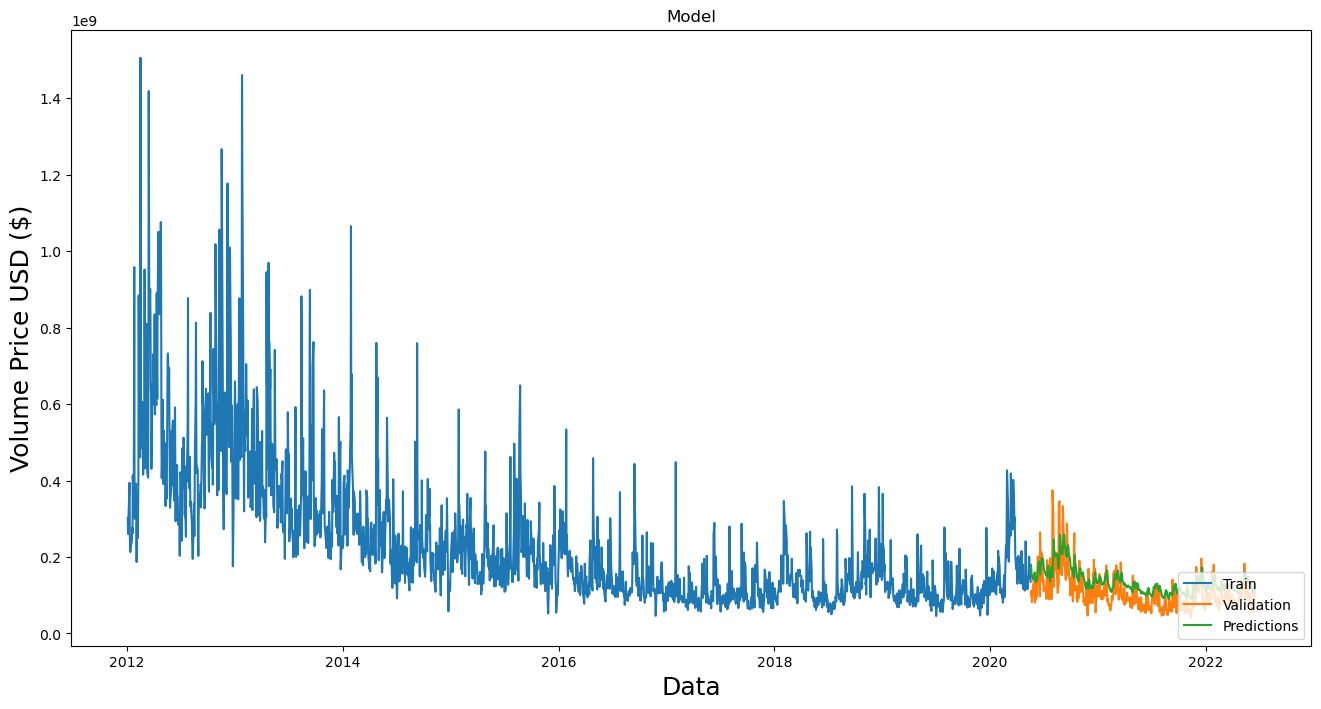

In [443]:
#plot the data
train5=data5[0:training5_data_len]
valid5=data5[training5_data_len:]
valid5['Predictions']=predictions5
#Visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data',fontsize=18)
plt.ylabel('Volume Price USD ($)', fontsize=18)
plt.plot(train5['Volume'])
plt.plot(valid5[['Volume','Predictions']])
plt.legend(['Train','Validation','Predictions'], loc='lower right')
plt.show()

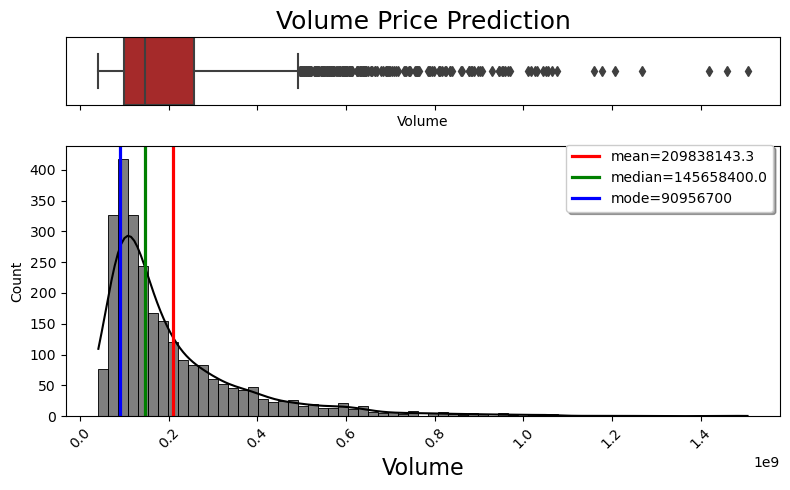

In [444]:
num_plot(data5,"Volume", "Volume Price Prediction","")

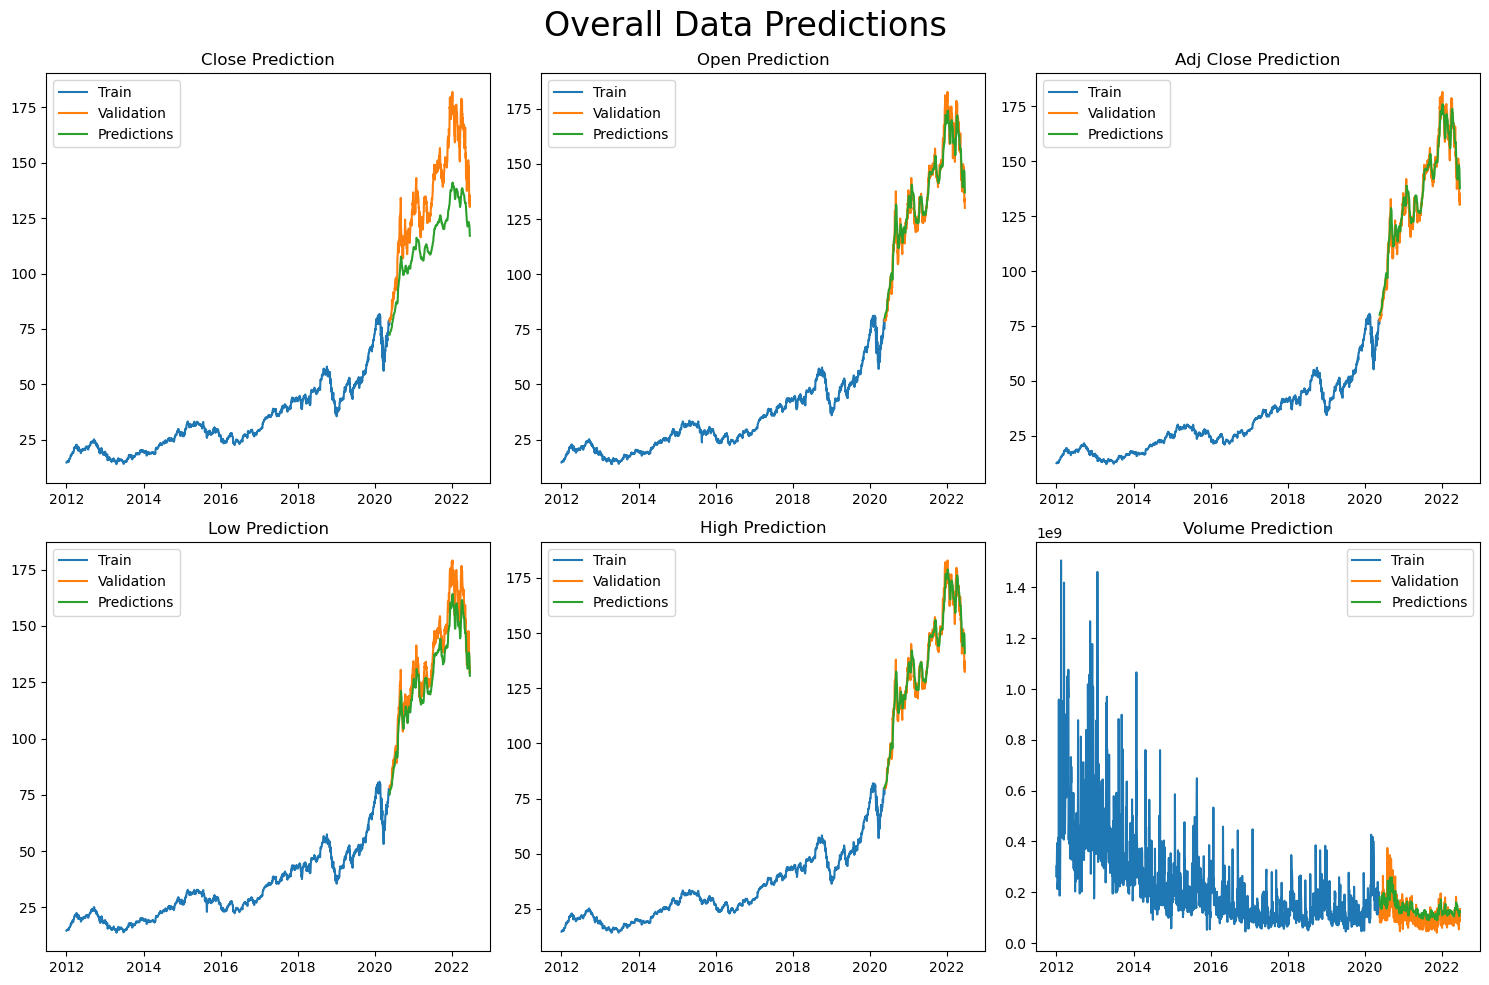

In [445]:
fig, axs = plt.subplots(2, 3, figsize=(15,10))
fig.suptitle('Overall Data Predictions',fontsize=24)
axs[0,0].plot(train['Close'])
axs[0,0].plot(valid[['Close','Predictions']])
axs[0,0].legend(['Train','Validation','Predictions'])
axs[0,0].set_title("Close Prediction")

axs[0,1].plot(train1['Open'])
axs[0,1].plot(valid1[['Open','Predictions']])
axs[0,1].legend(['Train','Validation','Predictions'])
axs[0,1].set_title("Open Prediction")

axs[0,2].plot(train2['Adj Close'])
axs[0,2].plot(valid2[['Adj Close','Predictions']])
axs[0,2].legend(['Train','Validation','Predictions'])
axs[0,2].set_title("Adj Close Prediction")

axs[1,0].plot(train3['Low'])
axs[1,0].plot(valid3[['Low','Predictions']])
axs[1,0].legend(['Train','Validation','Predictions'])
axs[1,0].set_title("Low Prediction")

axs[1,1].plot(train4['High'])
axs[1,1].plot(valid4[['High','Predictions']])
axs[1,1].legend(['Train','Validation','Predictions'])
axs[1,1].set_title("High Prediction")

axs[1,2].plot(train5['Volume'])
axs[1,2].plot(valid5[['Volume','Predictions']])
axs[1,2].legend(['Train','Validation','Predictions'])
axs[1,2].set_title("Volume Prediction")
fig.tight_layout()

In [446]:
#show the valid and predicted price
print(valid),print(valid1),print(valid2),print(valid3),print(valid4),print(valid5)

                 Close  Predictions
Date                               
2020-05-19   78.285004    72.428253
2020-05-20   79.807503    72.674835
2020-05-21   79.212502    73.021637
2020-05-22   79.722504    73.321899
2020-05-26   79.182503    73.616890
...                ...          ...
2022-06-13  131.880005   121.572716
2022-06-14  132.759995   120.135887
2022-06-15  135.429993   118.836853
2022-06-16  130.059998   118.011589
2022-06-17  131.559998   117.051804

[526 rows x 2 columns]
                  Open  Predictions
Date                               
2020-05-19   78.757500    80.195671
2020-05-20   79.169998    80.471390
2020-05-21   79.665001    80.836510
2020-05-22   78.942497    81.268456
2020-05-26   80.875000    81.595642
...                ...          ...
2022-06-13  132.869995   146.195267
2022-06-14  133.130005   143.941360
2022-06-15  134.289993   141.367523
2022-06-16  132.080002   139.111862
2022-06-17  130.070007   137.034653

[526 rows x 2 columns]
             Adj

(None, None, None, None, None, None)